In [1]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Pull IYT (Transportation ETF) data
ticker = "IYT" 
start= "2018-01-01" 
end= "2022-04-01"

transport = yf.download(ticker, start=start, end=end,progress=False)
transport = transport.asfreq(freq='D').ffill().dropna()
transport.to_csv('resources/transport.csv')
transport.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-27,269.299988,269.299988,266.369995,269.010010,269.010010,101800.0
2022-03-28,269.260010,271.940002,268.380005,271.940002,271.940002,135400.0
2022-03-29,274.359985,276.869995,273.679993,276.160004,276.160004,231500.0
2022-03-30,275.040009,275.989990,273.100006,274.230011,274.230011,119000.0
2022-03-31,274.070007,275.070007,269.750000,269.950012,269.950012,104900.0


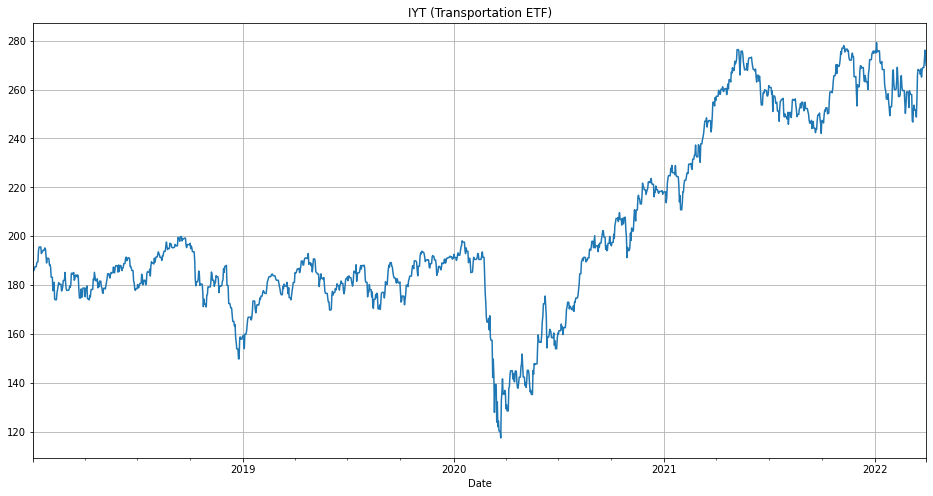

In [6]:
#Plot IYT historical prices
transport_plot = transport['Adj Close'].plot(figsize=(16,8), title='IYT (Transportation ETF)', grid=True)

In [7]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "2018-01-01" 
end= "2022-04-01"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.to_csv('resources/sp_history.csv')
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-27,4522.910156,4546.029785,4501.069824,4543.060059,4543.060059,3.577520e+09
2022-03-28,4541.089844,4575.649902,4517.689941,4575.520020,4575.520020,3.696850e+09
2022-03-29,4602.859863,4637.299805,4589.660156,4631.600098,4631.600098,4.239660e+09
2022-03-30,4624.200195,4627.770020,4581.319824,4602.450195,4602.450195,3.665390e+09
2022-03-31,4599.020020,4603.069824,4530.410156,4530.410156,4530.410156,3.782040e+09


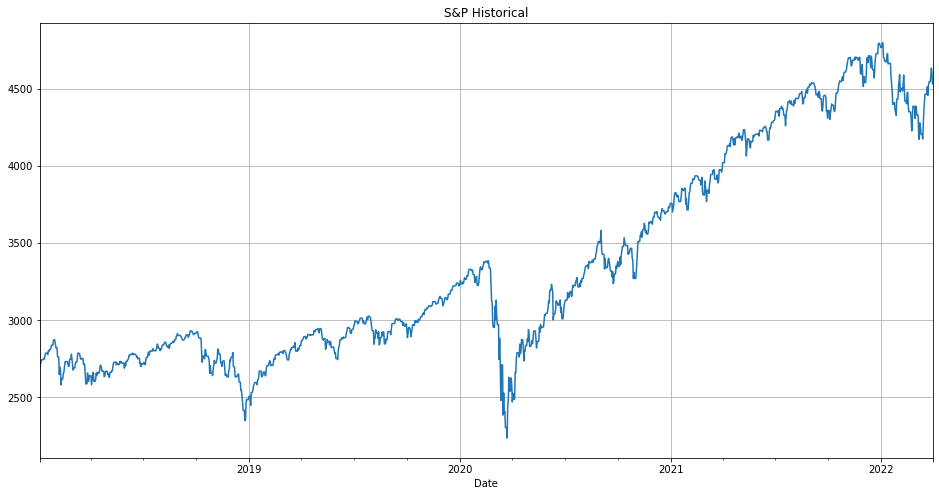

In [8]:
#Plot S&P Index historical data
sp_plot = sp_history['Adj Close'].plot(figsize=(16,8), title='S&P Historical', grid=True)

In [9]:
#Calculate IYT percent change and 200-day rolling average
transport_percent_change = transport['Adj Close'].pct_change()
transport_percent_change_rolling = transport_percent_change.rolling(window=200).mean()

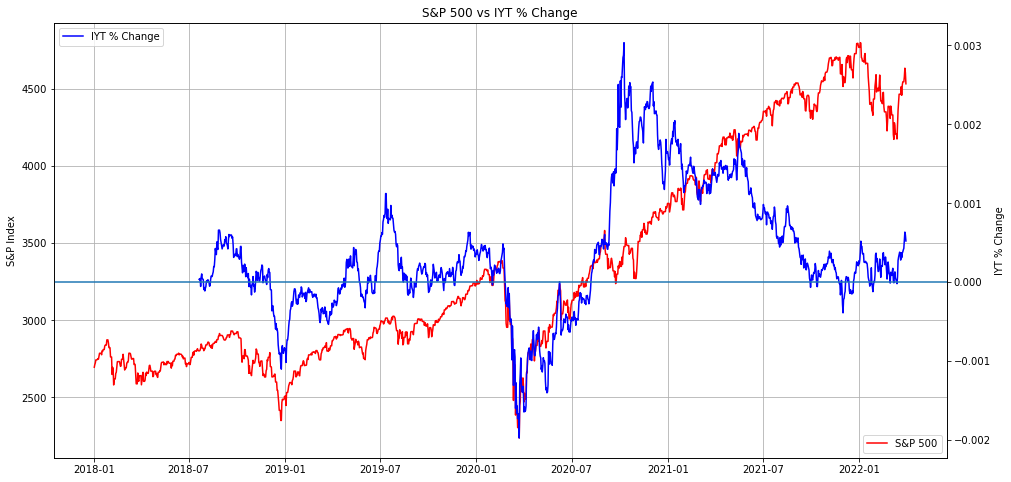

In [10]:
#Plot IYT percent change 200-day rolling average vs S&P 500 index to identify % change below and above y value of 0 
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P Index')
plt.grid()
ax.legend(loc='lower right')

ax2 = ax.twinx()
plt.plot(transport_percent_change_rolling, label='IYT % Change', color='b')
ax.set_title('S&P 500 vs IYT % Change')
ax2.set_ylabel('IYT % Change')
ax2.axhline(y=0)
ax2.legend(loc='upper left')